In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

from pcp import pcp
from pcp import radar_pcp
from skimage.io import imread

In [2]:
image_dir = 'RGB_images'
bounds_file_path = 'bounds_vel_thresh.txt'
# bounds_file_path = 'bounds.txt'

with open(bounds_file_path, "rb") as fp:   # Unpickling
    bounds = pickle.load(fp)
images = np.array([imread(os.path.join(image_dir, 'rgb_{}.png'.format(i)), 'gray') for i in range(len(bounds))])

In [3]:
D = images.reshape(images.shape[0], -1).T

def build_M_F(shape, bounds, gamma_b, gamma_f):
    M_F = np.zeros(shape)
    for i in range(len(bounds)):
        for j in range(len(bounds[i])):
            f_l = bounds[i][j, 0]
            f_r = bounds[i][j, 1]
            M_F[i, :, f_l:f_r] = gamma_f
    M_F[M_F != gamma_f] = gamma_b
    return M_F.reshape(shape[0], -1).T

In [4]:
gamma_b = 2
gamma_f = 1
M_F = build_M_F(images.shape, bounds, gamma_b, gamma_f)

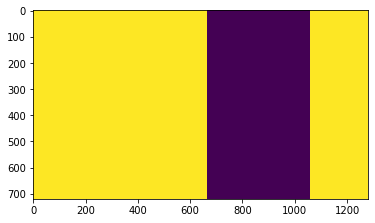

In [5]:
plt.imshow(M_F[:,15].reshape(images[0].shape))
plt.show()

In [6]:
L_pcp, S_pcp, _ = pcp(D, verbose=True, maxiter=10)


mu = 0.6283823935092239
Iteration 0: error=1.978e-03, rank=50, nnz=4304262, time=1.898e+00
Iteration 1: error=1.824e-04, rank=50, nnz=5170610, time=1.699e+00
Iteration 2: error=1.155e-04, rank=50, nnz=5735538, time=1.921e+00
Iteration 3: error=1.044e-04, rank=50, nnz=6253084, time=1.913e+00
Iteration 4: error=1.007e-04, rank=50, nnz=6757052, time=1.919e+00
Iteration 5: error=9.795e-05, rank=50, nnz=7246970, time=1.738e+00
Iteration 6: error=9.546e-05, rank=50, nnz=7719852, time=1.699e+00
Iteration 7: error=9.300e-05, rank=50, nnz=8174988, time=1.691e+00
Iteration 8: error=9.064e-05, rank=50, nnz=8611455, time=1.725e+00


Iteration 9: error=8.828e-05, rank=50, nnz=9029712, time=1.690e+00


In [7]:
L_radar, S_radar, _ = radar_pcp(D, M_F, verbose=True, maxiter=10)

mu = 0.6283823935092239
Iteration 0: error=2.433e-03, rank=50, nnz=1279713, time=1.817e+00
Iteration 1: error=1.565e-04, rank=50, nnz=1414507, time=1.705e+00
Iteration 2: error=7.892e-05, rank=50, nnz=1485297, time=1.696e+00
Iteration 3: error=6.538e-05, rank=50, nnz=1546083, time=1.705e+00
Iteration 4: error=5.863e-05, rank=50, nnz=1601150, time=1.707e+00
Iteration 5: error=5.343e-05, rank=50, nnz=1651692, time=1.712e+00
Iteration 6: error=4.895e-05, rank=50, nnz=1697706, time=1.694e+00
Iteration 7: error=4.530e-05, rank=50, nnz=1739932, time=1.690e+00
Iteration 8: error=4.193e-05, rank=50, nnz=1778218, time=1.699e+00


Iteration 9: error=3.914e-05, rank=50, nnz=1813428, time=1.701e+00


(-0.5, 1279.5, 719.5, -0.5)

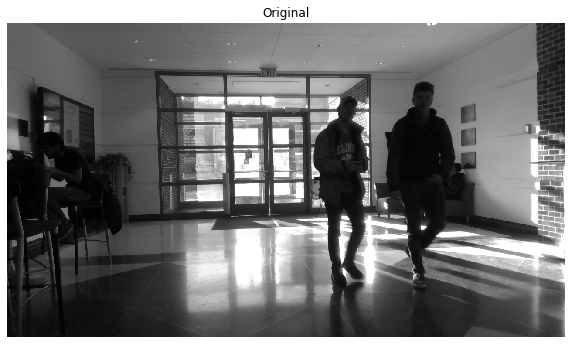

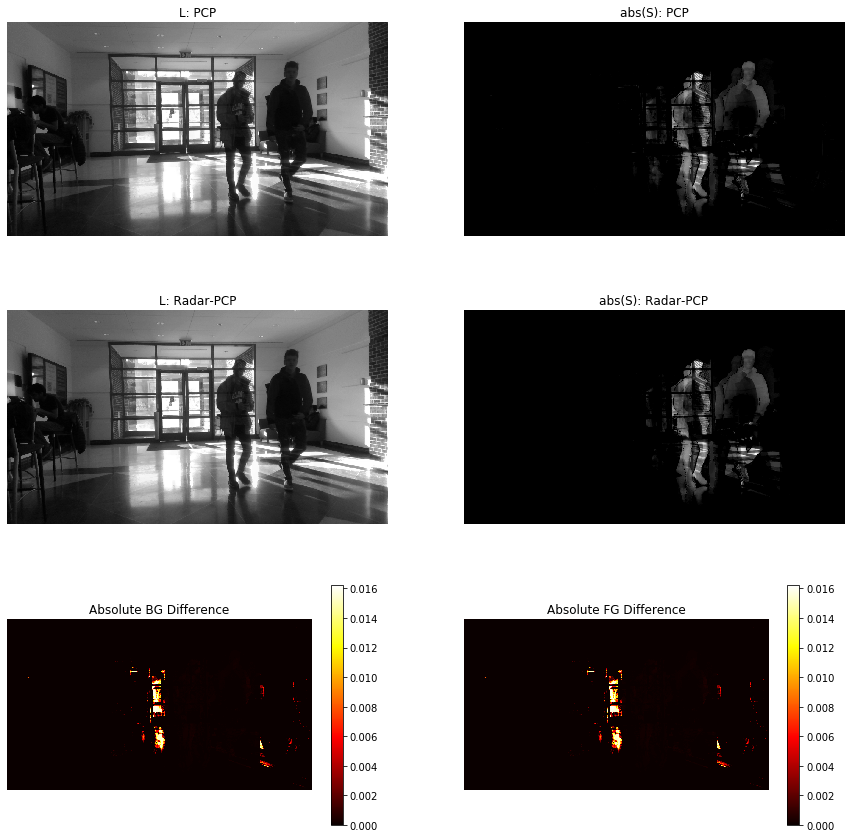

In [9]:
i = 15
plt.figure(figsize=(10,6))
plt.title('Original')
plt.imshow(images[i], 'gray')
plt.axis('off')
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('L: PCP')
plt.imshow(L_pcp[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(322)
plt.title('abs(S): PCP')
plt.imshow(abs(S_pcp[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')
plt.subplot(323)
plt.title('L: Radar-PCP')
plt.imshow(L_radar[:, i].reshape(images.shape[1], images.shape[2]), 'gray')
plt.axis('off')
plt.subplot(324)
plt.title('abs(S): Radar-PCP')
plt.imshow(abs(S_radar[:, i].reshape(images.shape[1], images.shape[2])), 'gray')
plt.axis('off')
plt.subplot(325)
plt.title('Absolute BG Difference')
plt.imshow(abs(L_radar[:, i]-L_pcp[:, i]).reshape(images.shape[1], images.shape[2]), 'hot')
plt.colorbar()
plt.axis('off')
plt.subplot(326)
plt.title('Absolute FG Difference')
plt.imshow(abs(S_radar[:, i]-S_pcp[:, i]).reshape(images.shape[1], images.shape[2]), 'hot')
plt.colorbar()
plt.axis('off')